# Welcome to WEEK3 of SWE3032 
### Tutorials using Titanic dataset 

This week we'll learn how to load the Titanic survivor dataset available on [Kaggle](https://www.kaggle.com/c/titanic/data) and explore the daset with visualization.

![alt text](https://upload.wikimedia.org/wikipedia/commons/thumb/d/db/Titanic-Cobh-Harbour-1912.JPG/330px-Titanic-Cobh-Harbour-1912.JPG)

https://www.kaggle.com/c/titanic/data

The Challenge
The sinking of the Titanic is one of the most infamous shipwrecks in history.

On April 15, 1912, during her maiden voyage, the widely considered “unsinkable” RMS Titanic sank after colliding with an iceberg. Unfortunately, there weren’t enough lifeboats for everyone onboard, resulting in the death of 1502 out of 2224 passengers and crew.

While there was some element of luck involved in surviving, it seems some groups of people were more likely to survive than others.

In this challenge, we ask you to build a predictive model that answers the question: **“what sorts of people were more likely to survive?”** using passenger data (ie name, age, gender, socio-economic class, etc).


In [2]:
# import packages
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import torch
from torch.utils.data import DataLoader

from google.colab import files
import io
import warnings

warnings.filterwarnings(action='ignore')

In [3]:
# import the Titanic dataset as a training dataset
uploaded = files.upload()

Saving train.csv to train.csv


In [4]:
train = pd.read_csv(io.BytesIO(uploaded['train.csv']))
train.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


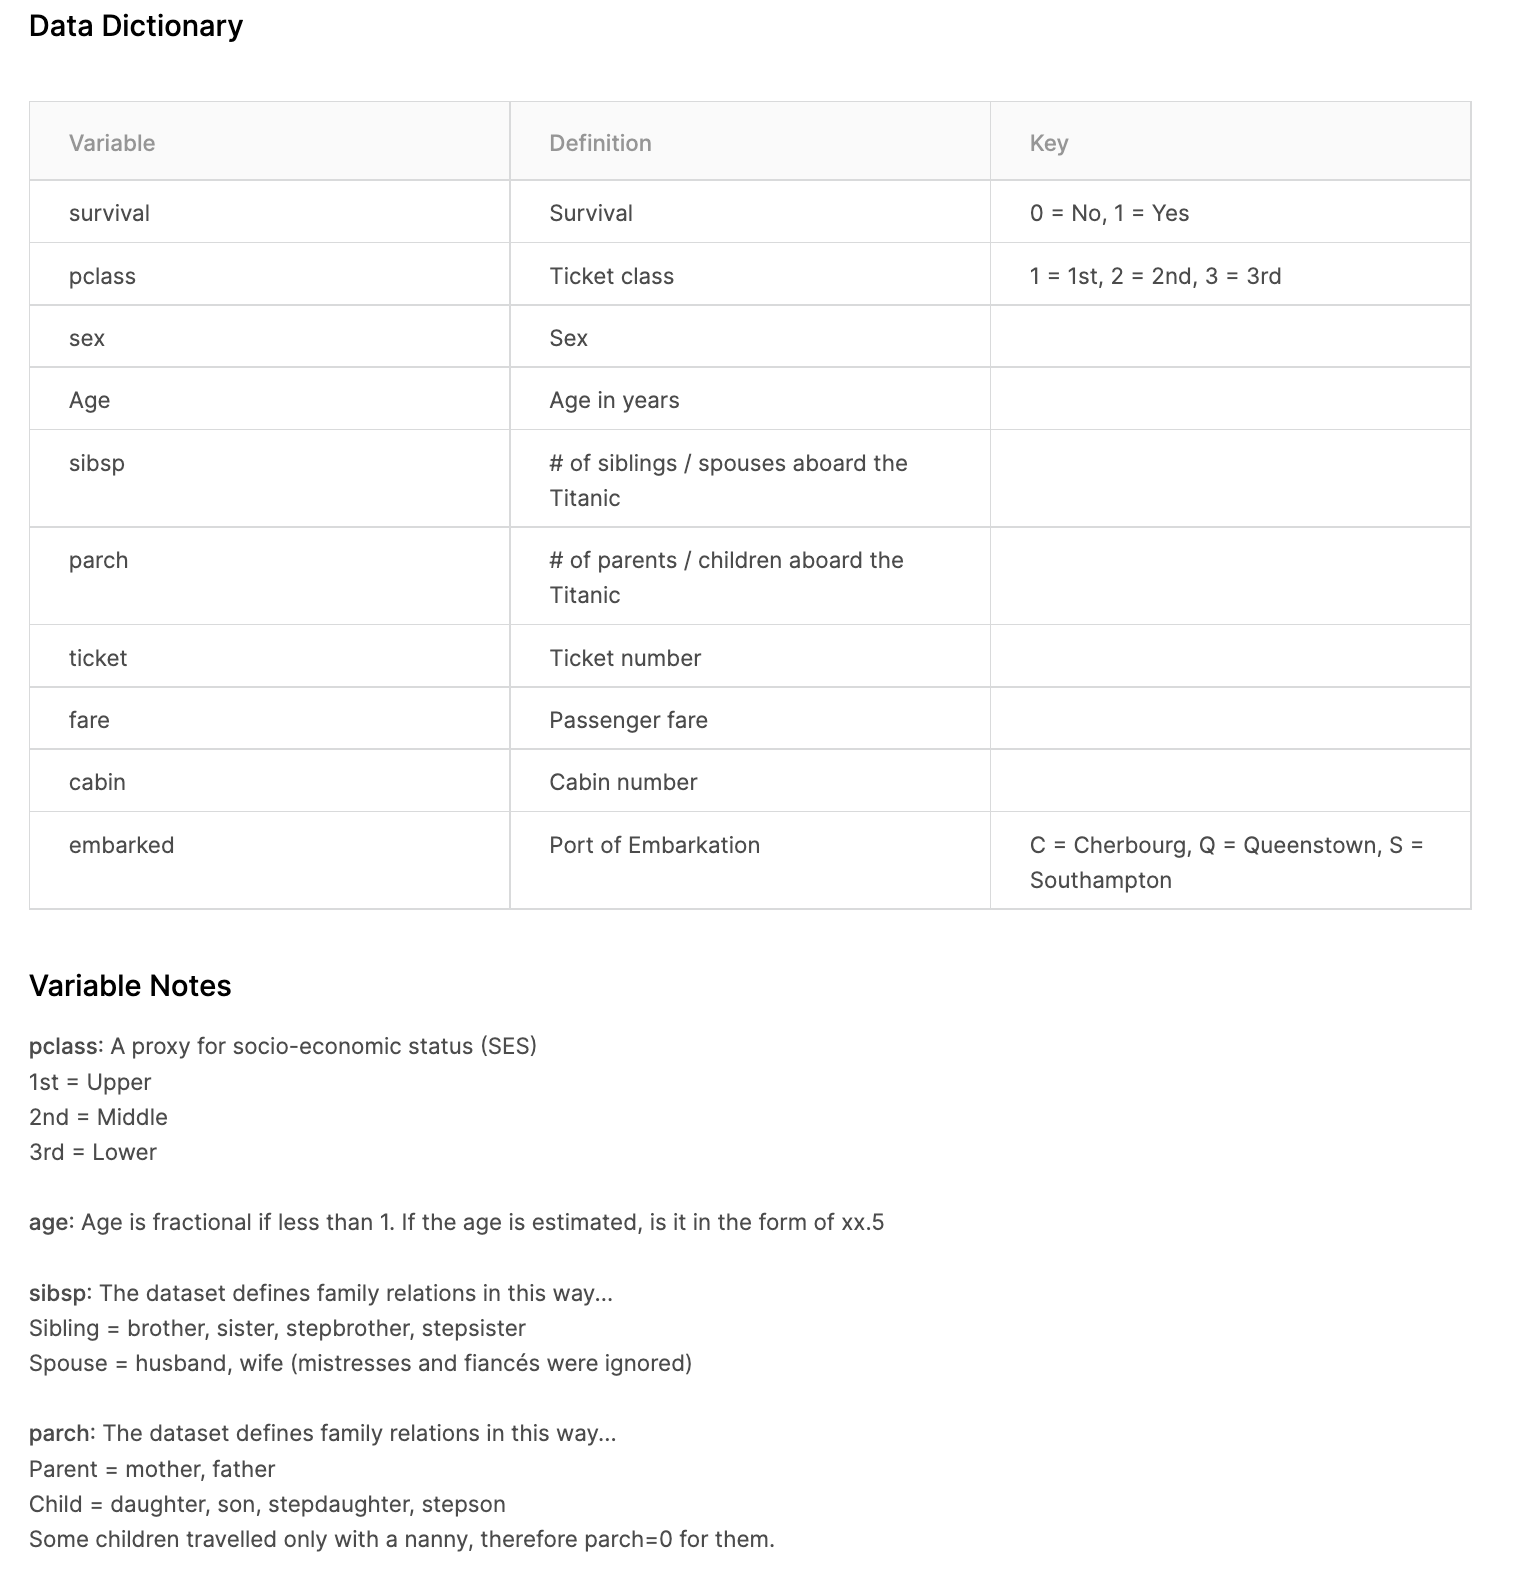

In [5]:
uploaded = files.upload()
test = pd.read_csv(io.BytesIO(uploaded['test.csv']))
print(test.shape)

Saving test.csv to test.csv
(418, 11)


In [6]:
train.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [7]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

## Load the dataset in a different way
### Google Drive에서 가져오기 // Kaggle에서 가져오기

In [8]:
# Load datasets from google drive
from google.colab import drive 
drive.mount('/content/gdrive/')

Mounted at /content/gdrive/


In [9]:
# Load datasets from Kaggle
# https://www.kaggle.com/general/51898
# 1. Download the Kaggle API token at account page
# 2. Mount the Google drive
# 3. Upload the “kaggle.json” file into the folder in google drive where you want to download the Kaggle dataset.
# 4. Install Kaggle API
# 5. Change the current working directory to where you want to download the Kaggle dataset.
# 6. Run the following code to configure the path to “kaggle.json”.
# 7. Download the dataset.

!pip install kaggle
%cd /content/drive/MyDrive/swe3032/titanic

import os
os.environ['KAGGLE_CONFIG_DIR'] = "/content/drive/MyDrive/swe3032/titanic"

!kaggle competitions download -c titanic

[Errno 2] No such file or directory: '/content/drive/MyDrive/swe3032/titanic'
/content
Traceback (most recent call last):
  File "/usr/local/bin/kaggle", line 5, in <module>
    from kaggle.cli import main
  File "/usr/local/lib/python2.7/dist-packages/kaggle/__init__.py", line 23, in <module>
    api.authenticate()
  File "/usr/local/lib/python2.7/dist-packages/kaggle/api/kaggle_api_extended.py", line 146, in authenticate
    self.config_file, self.config_dir))
IOError: Could not find kaggle.json. Make sure it's located in /content/drive/MyDrive/swe3032/titanic. Or use the environment method.


# change the data into numbers

In [10]:
# changing the "male" and "female" into 0 and 1 respectively
train['Sex'] = train["Sex"].replace({"male" : 0})
train['Sex'] = train["Sex"].replace({"female" : 1})
test['Sex'] = test["Sex"].replace({"male" : 0, "female" : 1})
train['Sex'].value_counts()

0    577
1    314
Name: Sex, dtype: int64

In [11]:
print('# of NULL data of variable Sex: ', train['Sex'].isnull().sum())

# of NULL data of variable Sex:  0


### Problem 1
#### Change 'Embark' data into numbers! for the null values, choose your own method(most frequent embarked data, or else)
#### (10 point)

In [12]:
# change Embarked data into numbers! for the null values, choose your own method(most frequent embarked data... or else)
train['Embarked'] = train['Embarked'].replace({"S":0})
train['Embarked'] = train['Embarked'].replace({"C":1})
train['Embarked'] = train['Embarked'].replace({"Q":2})
replace = [ sum(train['Embarked']==0), sum(train['Embarked']==1), sum(train['Embarked']==2) ]
print(replace.index(max(replace)))
train['Embarked'].fillna(replace.index(max(replace)), inplace = True)

0


In [13]:
print('# of NULL data of variable Embarked: ', train['Embarked'].isnull().sum())

# of NULL data of variable Embarked:  0


# Data scaling

In [14]:
train.describe()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
count,891.000000,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,0.352413,29.699118,0.523008,0.381594,32.204208,0.361392
std,257.353842,0.486592,0.836071,0.477990,14.526497,1.102743,0.806057,49.693429,0.635673
min,1.000000,0.000000,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,0.000000,20.125000,0.000000,0.000000,7.910400,0.000000
50%,446.000000,0.000000,3.000000,0.000000,28.000000,0.000000,0.000000,14.454200,0.000000
75%,668.500000,1.000000,3.000000,1.000000,38.000000,1.000000,0.000000,31.000000,1.000000
max,891.000000,1.000000,3.000000,1.000000,80.000000,8.000000,6.000000,512.329200,2.000000


### Problem 2
#### change the Age data with normalization 
#####(data - data.mean)/ data.std
#### 10 points

In [15]:
# fill the nan values withs mean values.
train['Age'].fillna(train['Age'].mean(), inplace = True)
# change the Age data with normalization ( (data - data.mean)/data.std)
train['Age'] = (train['Age'] - train['Age'].mean()) / train['Age'].std()

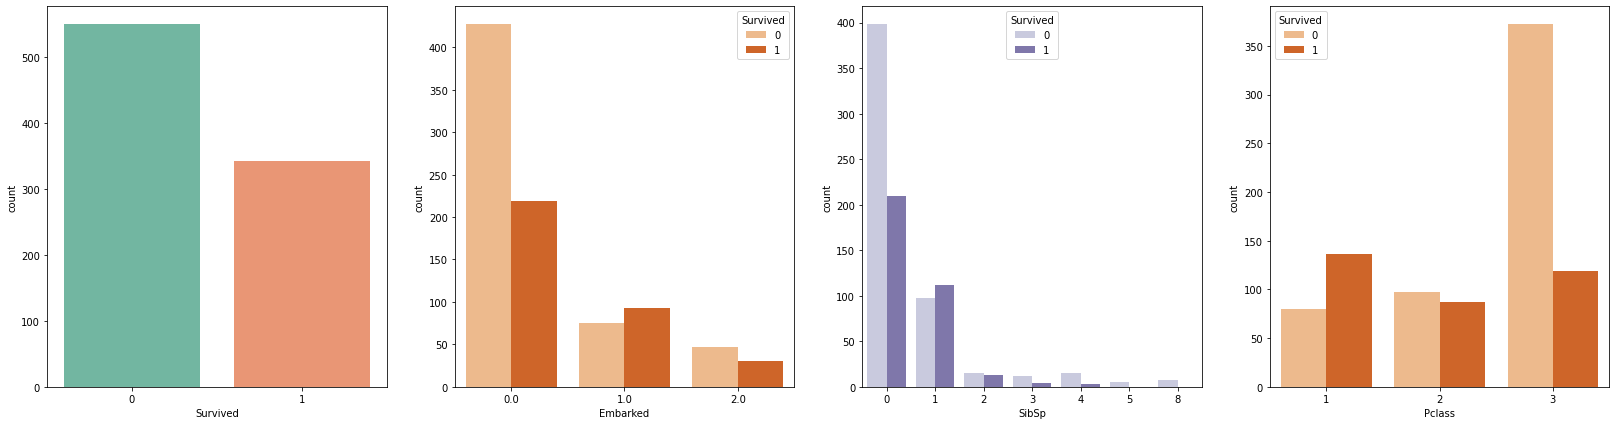

In [16]:
fig, ax = plt.subplots(1,4,figsize=(28, 7))
sns.countplot(train.Survived, palette="Set2", ax=ax[0])
sns.countplot(train.Embarked, hue=train.Survived, ax=ax[1], palette="Oranges")
sns.countplot(train.SibSp, hue=train.Survived, ax=ax[2], palette="Purples")
sns.countplot(train.Pclass, hue=train.Survived, ax=ax[3], palette="Oranges")

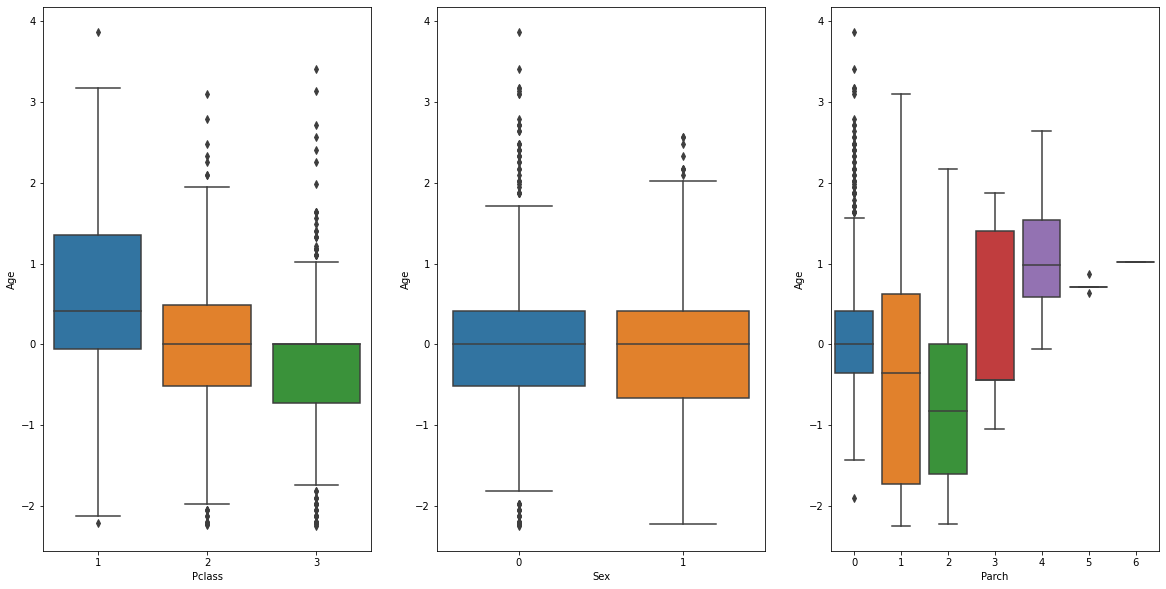

In [17]:
fig, ax = plt.subplots(1,3,figsize=(20,10))
sns.boxplot(x='Pclass',y='Age',data=train, ax=ax[0])
sns.boxplot(x='Sex', y='Age', data=train, ax=ax[1])
sns.boxplot(x='Parch', y='Age', data=train, ax=ax[2])

# Insight
* people who survived and not survived is not balancing.
* write down the insights you found on the visualization above

#### Problem 3
##### Write down the insights you can find on figures above
##### Write more than two insights
##### 10 points

In [18]:
# write down the insights here or at Markdown right above!!
# 3rd Class passengers were died much more than other class passengers.
# Survival rates are higher for people with companions, such as siblings or spouses, than for single guests.

![title](https://ifh.cc/g/W3Bypi.jpg)


#### Problem 4
##### make heatmap with our data like shown in figure 

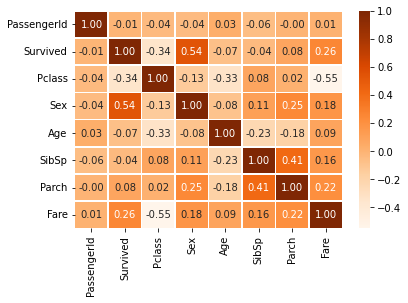

In [21]:
train.drop(['Embarked'], axis=1, inplace=True)
sns.heatmap(data = train.corr(), annot=True, 
fmt = '.2f', linewidths=.5, cmap='Oranges')


### Drop ineffective datas 

In [22]:
#for example, if you think that passengerID is not related with surivial, we should drop passengerID
# train.drop(['PassengerId'], axis=1, inplace=True)
# test.drop(['PassengerId'], axis=1, inplace=True)

In [23]:
# Prepare your data for training with DataLoaders
train_dataloader = DataLoader(train, batch_size = 64, shuffle=True)
test_dataloader = DataLoader(test, batch_size = 64, shuffle=True)